In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb, reuters
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, LSTM, Dense
from tensorflow.keras.utils import to_categorical


In [2]:
max_features = 10000
maxlen = 200

(x_train_imdb, y_train_imdb), (x_test_imdb, y_test_imdb) = imdb.load_data(num_words=max_features)
x_train_imdb = pad_sequences(x_train_imdb, maxlen=maxlen)
x_test_imdb = pad_sequences(x_test_imdb, maxlen=maxlen)


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
(x_train_reuters, y_train_reuters), (x_test_reuters, y_test_reuters) = reuters.load_data(num_words=max_features)
x_train_reuters = pad_sequences(x_train_reuters, maxlen=maxlen)
x_test_reuters = pad_sequences(x_test_reuters, maxlen=maxlen)

num_classes = np.max(y_train_reuters) + 1
y_train_reuters = to_categorical(y_train_reuters, num_classes)
y_test_reuters = to_categorical(y_test_reuters, num_classes)


2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
def build_model(cell_type='LSTM', num_classes=1):
    model = Sequential()
    model.add(Embedding(max_features, 128))
    if cell_type == 'GRU':
        model.add(GRU(64))
    else:
        model.add(LSTM(64))
    model.add(Dense(num_classes, activation='sigmoid' if num_classes == 1 else 'softmax'))
    model.compile(loss='binary_crossentropy' if num_classes == 1 else 'categorical_crossentropy',
                  optimizer='adam', metrics=['accuracy'])
    return model


In [5]:
def train_and_evaluate(cell_type, x_train, y_train, x_test, y_test, dataset_name):
    model = build_model(cell_type, y_train.shape[1] if len(y_train.shape) > 1 else 1)
    history = model.fit(x_train, y_train, epochs=3, batch_size=64, validation_split=0.2, verbose=0)
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
    print(f"{cell_type} on {dataset_name} — Accuracy: {test_acc:.4f}")
    return history


In [6]:
def plot_history(histories, title):
    plt.figure(figsize=(10, 6))
    for label, history in histories.items():
        plt.plot(history.history['val_accuracy'], label=f'{label}')
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Validation Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()


GRU on IMDB — Accuracy: 0.8625
GRU on Reuters — Accuracy: 0.5592
LSTM on IMDB — Accuracy: 0.8596
LSTM on Reuters — Accuracy: 0.5659


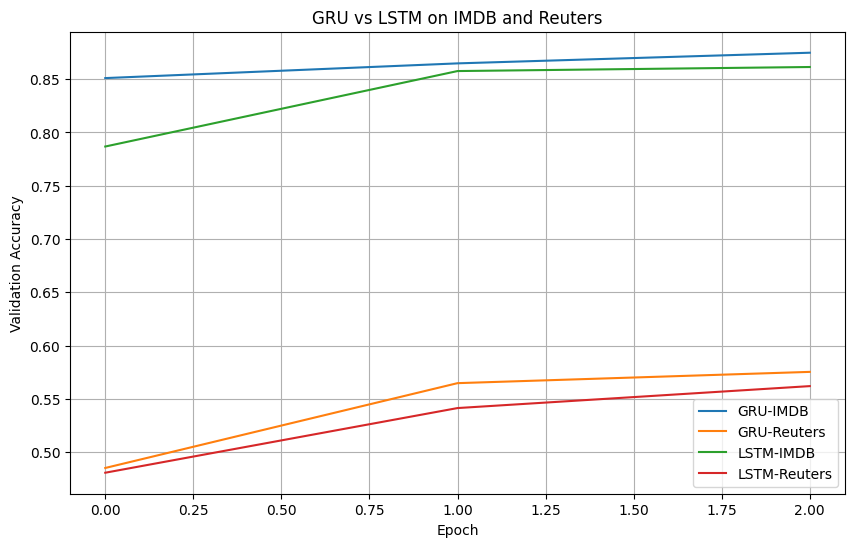

In [7]:
histories = {}
for cell in ['GRU', 'LSTM']:
    histories[f'{cell}-IMDB'] = train_and_evaluate(cell, x_train_imdb, y_train_imdb, x_test_imdb, y_test_imdb, 'IMDB')
    histories[f'{cell}-Reuters'] = train_and_evaluate(cell, x_train_reuters, y_train_reuters, x_test_reuters, y_test_reuters, 'Reuters')

plot_history(histories, "GRU vs LSTM on IMDB and Reuters")


In [8]:
from tensorflow.keras.datasets import reuters
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=10000)



In [9]:
from tensorflow.keras.datasets import imdb
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)


In [11]:
from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))
texts, labels = data.data, data.target


In [12]:
%pip install datasets

In [13]:
from datasets import load_dataset

dataset = load_dataset("ag_news")
train_dataset = dataset['train']
test_dataset = dataset['test']

# Accessing the data
texts_train = train_dataset['text']
labels_train = train_dataset['label']
texts_test = test_dataset['text']
labels_test = test_dataset['label']

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/18.6M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/1.23M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/120000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/7600 [00:00<?, ? examples/s]

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, LSTM, Dense
from tensorflow.keras.utils import to_categorical
from datasets import load_dataset


In [15]:
def load_keras_dataset(name, max_features=10000, maxlen=200):
    if name == "imdb":
        from tensorflow.keras.datasets import imdb
        (x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
        num_classes = 1
    elif name == "reuters":
        from tensorflow.keras.datasets import reuters
        (x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=max_features)
        num_classes = np.max(y_train) + 1
        y_train = to_categorical(y_train, num_classes)
        y_test = to_categorical(y_test, num_classes)
    x_train = pad_sequences(x_train, maxlen=maxlen)
    x_test = pad_sequences(x_test, maxlen=maxlen)
    return x_train, y_train, x_test, y_test, num_classes


In [16]:
def load_ag_news(max_features=10000, maxlen=200):
    dataset = load_dataset("ag_news")
    from tensorflow.keras.preprocessing.text import Tokenizer
    tokenizer = Tokenizer(num_words=max_features)
    tokenizer.fit_on_texts(dataset['train']['text'])

    x_train = tokenizer.texts_to_sequences(dataset['train']['text'])
    x_test = tokenizer.texts_to_sequences(dataset['test']['text'])
    x_train = pad_sequences(x_train, maxlen=maxlen)
    x_test = pad_sequences(x_test, maxlen=maxlen)

    y_train = to_categorical(dataset['train']['label'], num_classes=4)
    y_test = to_categorical(dataset['test']['label'], num_classes=4)
    return x_train, y_train, x_test, y_test, 4


In [17]:
def build_model(cell_type='LSTM', num_classes=1, max_features=10000):
    model = Sequential()
    model.add(Embedding(max_features, 128))
    if cell_type == 'GRU':
        model.add(GRU(64))
    else:
        model.add(LSTM(64))
    model.add(Dense(num_classes, activation='sigmoid' if num_classes == 1 else 'softmax'))
    model.compile(loss='binary_crossentropy' if num_classes == 1 else 'categorical_crossentropy',
                  optimizer='adam', metrics=['accuracy'])
    return model


In [19]:
def train_and_evaluate(cell_type, x_train, y_train, x_test, y_test, dataset_name):
    model = build_model(cell_type, y_train.shape[1] if len(y_train.shape) > 1 else 1)
    history = model.fit(x_train, y_train, epochs=3, batch_size=64, validation_split=0.2, verbose=0)
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
    print(f"{cell_type} on {dataset_name} — Accuracy: {test_acc:.4f}")
    return history


In [20]:
def plot_history(histories, title):
    plt.figure(figsize=(10, 6))
    for label, history in histories.items():
        plt.plot(history.history['val_accuracy'], label=label)
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Validation Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()


GRU on IMDB — Accuracy: 0.8649
LSTM on IMDB — Accuracy: 0.8348
GRU on Reuters — Accuracy: 0.5855
LSTM on Reuters — Accuracy: 0.5744
GRU on AG News — Accuracy: 0.9080
LSTM on AG News — Accuracy: 0.9057


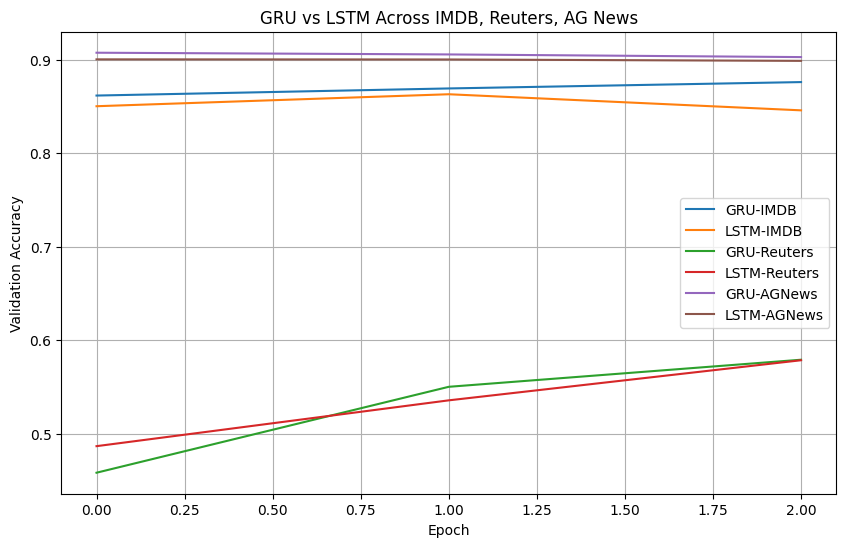

In [21]:
histories = {}

# IMDB
x_train, y_train, x_test, y_test, num_classes = load_keras_dataset("imdb")
for cell in ['GRU', 'LSTM']:
    histories[f'{cell}-IMDB'] = train_and_evaluate(cell, x_train, y_train, x_test, y_test, 'IMDB')

# Reuters
x_train, y_train, x_test, y_test, num_classes = load_keras_dataset("reuters")
for cell in ['GRU', 'LSTM']:
    histories[f'{cell}-Reuters'] = train_and_evaluate(cell, x_train, y_train, x_test, y_test, 'Reuters')

# AG News
x_train, y_train, x_test, y_test, num_classes = load_ag_news()
for cell in ['GRU', 'LSTM']:
    histories[f'{cell}-AGNews'] = train_and_evaluate(cell, x_train, y_train, x_test, y_test, 'AG News')

plot_history(histories, "GRU vs LSTM Across IMDB, Reuters, AG News")


RNN: Basically runs any RNN cell for example, SimpleRNNCell, GRUCell and LSTMCell cross time steps. This control over the cell behavior, state handling and stacking.

SimpleRNNCell: This is for light weight models mostly can me used in educational demos or short term memory limitations.

GRUCell: This is more efficient that LSTM but with fewer parameters than LSTM.Basically they A gated unit with update and reset gates...

LSTMCell: The core unit of LSTM with input, forget, and output gates for building interpretable LSTM layers from scratch or stacking multiple cells.

StackedRNNCells: A wrapper that stacks multiple RNN cells into one composite cell. Create deep RNNs with multiple layers of recurrence inside a single RNN wrapper.